In [176]:
!pip install dash dash-renderer dash-html-components dash-core-components plotly

  Created wheel for dash: filename=dash-1.9.0-py3-none-any.whl size=71498 sha256=bb6010efe3385bdac3fa9bf33a7aea973778f0d0a8c6a8da7eca567353095e36
  Stored in directory: c:\users\trive\appdata\local\pip\cache\wheels\39\23\57\e2cbc7df1ebc88f7d856484e67d686e7bb2802f789629e71bf
  Created wheel for dash-renderer: filename=dash_renderer-1.2.4-py3-none-any.whl size=1146890 sha256=62b15d6ebc3b2aac8a0192dee8508206ae13dfe84695e490a60c0e8d18b8d377
  Stored in directory: c:\users\trive\appdata\local\pip\cache\wheels\5a\12\e8\9920d4d2ceeb46831c85b42a1ffd58f4ed59e0178bc031e7f0
  Created wheel for dash-html-components: filename=dash_html_components-1.0.2-py3-none-any.whl size=427909 sha256=decd3dcf76903e153014785479401fc0244cd3caa8e41417288cf9f9635e30ce
  Stored in directory: c:\users\trive\appdata\local\pip\cache\wheels\a6\d8\ef\32c8d935a11ddd862853d296a0963e7326fa10e7a14fe51343
  Created wheel for dash-core-components: filename=dash_core_components-1.8.0-py3-none-any.whl size=3395772 sha256=9b12560

In [1082]:
!pip install mapbox

In [69]:
!pip install bokeh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [874]:
import dash 
import dash_core_components as dcc
import dash_html_components as html




In [956]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-29-2020.csv'
daily_df=pd.read_csv(url)
daily_df.head()


,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-29T12:13:10,66337,2727,28993
1,NaN,South Korea,2020-02-29T18:13:07,3150,16,27
2,Guangdong,Mainland China,2020-02-29T15:33:03,1349,7,983
3,Henan,Mainland China,2020-02-29T12:43:05,1272,21,1170
4,Zhejiang,Mainland China,2020-02-29T09:13:10,1205,1,1016


In [957]:
new_daily_df=daily_df.drop(["Province/State","Last Update"], axis=1)
new_daily_df

,Country/Region,Confirmed,Deaths,Recovered
0,Mainland China,66337,2727,28993
1,South Korea,3150,16,27
2,Mainland China,1349,7,983
3,Mainland China,1272,21,1170
4,Mainland China,1205,1,1016
...,...,...,...,...
114,US,1,0,1
115,Australia,0,0,0
116,US,0,0,0
117,US,0,0,0


In [958]:
new_daily_df2 = newdf.groupby(['Country/Region']).agg('sum')
new_daily_df2


,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,1,0,0
Algeria,1,0,0
Australia,22,0,11
Austria,2,0,0
Bahrain,33,0,0
Belgium,1,0,1
Brazil,1,0,0
Cambodia,1,0,1
Canada,11,0,3


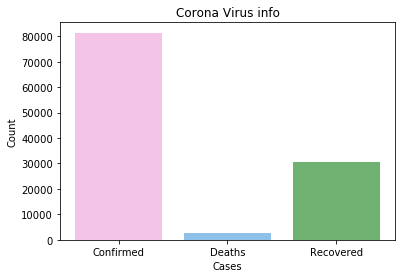

In [959]:
x=new_daily_df2.sum(axis=0)
myarray=np.array(x)

labels=np.array(['Confirmed','Deaths','Recovered'])
#y_pos = np.arange(len(labels))
color=['#F0AFE1','#69ADE3','#3D9740']

plt.bar(labels, myarray, alpha=0.75,color=color)

plt.xlabel('Cases')
plt.title('Corona Virus info')

plt.ylabel('Count')
plt.show()

In [960]:
fatality_rate=myarray[1]/myarray[0]*100;
print("Fatality rate=",fatality_rate,"%")

Fatality rate= 3.4030738233595836 %


In [925]:
confirmed_timeseries_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deaths_timeseries_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
recovered_timeseries_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'




In [935]:
timeseries_confirmed_df=pd.read_csv(confirmed_timeseries_url)
#making this bigpicture stuff
Bigpicture=timeseries_confirmed_df
timeseries_deaths_df=pd.read_csv(deaths_timeseries_url)
timeseries_recovered_df=pd.read_csv(recovered_timeseries_url)

In [939]:
new_timeseries_confirmed_df=timeseries_confirmed_df.drop(['Province/State','Lat','Long'],axis=1)
new_timeseries_deaths_df=timeseries_deaths_df.drop(['Province/State','Lat','Long'],axis=1)
new_timeseries_recovered_df=timeseries_recovered_df.drop(['Province/State','Lat','Long'],axis=1)



In [1208]:
new_timeseries_confirmed_df=new_timeseries_confirmed_df.groupby(['Country/Region'],as_index=False).agg('sum')
xc=new_timeseries_confirmed_df
select_country_1 = xc[xc['Country/Region'] == 'Mainland China']
select_country_1=select_country_1.loc[:,select_country_1.columns!='Country/Region']
xc=select_country_1.T
mapping={xc.columns[0]:'Confirmed cases in Main Land China'}
zc=xc.rename(columns=mapping)
zc=zc.rename_axis('Date').reset_index()


In [1209]:
new_timeseries_deaths_df=new_timeseries_deaths_df.groupby(['Country/Region'],as_index=False).agg('sum')
xd=new_timeseries_deaths_df
select_country_2 = xd[xd['Country/Region'] == 'Mainland China']
select_country_2=select_country_2.loc[:,select_country_2.columns!='Country/Region']
xd=select_country_2.T
mapping={xd.columns[0]:'Deaths in Main Land China'}
zd=xd.rename(columns=mapping)
zd=zd.rename_axis('Date').reset_index()


In [1210]:
new_timeseries_recovered_df=new_timeseries_recovered_df.groupby(['Country/Region'],as_index=False).agg('sum')
xr=new_timeseries_recovered_df
select_country_3 = xr[xr['Country/Region'] == 'Mainland China']
select_country_3=select_country_3.loc[:,select_country_3.columns!='Country/Region']
xr=select_country_3.T
mapping={xr.columns[0]:'Recovered in Main Land China'}
zr=xr.rename(columns=mapping)
zr=zr.rename_axis('Date').reset_index()


In [1213]:
CHINA_MAIN_FRAME = zc.iloc[:,0:2]
CHINA_MAIN_FRAME['Deaths in MainLand China'] = zd.iloc[:,1:2]
CHINA_MAIN_FRAME['Recovered in MainLand China']  = zr.iloc[:,1:2]
CHINA_MAIN_FRAME['Fatality Rate'] =CHINA_MAIN_FRAME['Deaths in MainLand China']/CHINA_MAIN_FRAME['Confirmed cases in Main Land China']*100
CHINA_MAIN_FRAME

,Date,Confirmed cases in Main Land China,Deaths in MainLand China,Recovered in MainLand China,Fatality Rate
0,1/22/20,547,17,28,3.107861
1,1/23/20,639,18,30,2.816901
2,1/24/20,916,26,36,2.838428
3,1/25/20,1399,42,39,3.002144
4,1/26/20,2062,56,49,2.715810
5,1/27/20,2863,82,58,2.864129
6,1/28/20,5494,131,101,2.384419
7,1/29/20,6070,133,120,2.191104
8,1/30/20,8124,171,135,2.104874
9,1/31/20,9783,213,214,2.177246


In [1207]:
#CHINA CONFIRMED CASES
fig_china_confirmed = go.Figure()
fig_china_confirmed.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Confirmed cases in Main Land China'], name="Confirmed",
                         line_color='#9970AB',mode='lines+markers'))
fig_china_confirmed.update_layout(title="Confirmed cases timeseries in china",template="plotly_dark",xaxis_title="Dates in mm/dd/yy",
    yaxis_title="Confirmed Count",showlegend=True)

fig_china_confirmed.show()

In [1206]:
fig_china_deaths = go.Figure()

fig_china_deaths.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Deaths in MainLand China'], name="Deaths",
                         line_color='#FC4E2A',mode='lines+markers'))
fig_china_deaths.update_layout(title="Deaths timeseries in china",template="plotly_dark",xaxis_title="Dates in mm/dd/yy",
    yaxis_title="Death count",showlegend=True)


fig_china_deaths.show()

In [1205]:
fig_china_recovered = go.Figure()

fig_china_recovered.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Recovered in MainLand China'], name="Recovered",
                         line_color='#B8E186',mode='lines+markers'))


fig_china_recovered.update_layout(title="Recovered timeseries in china",template="plotly_dark",xaxis_title="Dates in mm/dd/yy",
    yaxis_title="Recovered count",showlegend=True)


fig_china_recovered.show()

In [1217]:
#CHINA FATALITY RATE
fig_china_confirmed = go.Figure()
fig_china_confirmed.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Fatality Rate'], name="Fatality Rate",
                         line_color='#FECC5C',mode='lines+markers'))
fig_china_confirmed.update_layout(title="Fatality Rate timeseries in china",template="plotly_dark",xaxis_title="Dates in mm/dd/yy",
    yaxis_title="Rate in Percentage",showlegend=True)

fig_china_confirmed.show()

In [1204]:
#SCATTER PLOT FOR CHINA CONTAINS ALL
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
fig.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Confirmed cases in Main Land China'], name="Confirmed",
                         line_color='#9970AB',
                        mode='lines+markers'))

fig.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Deaths in MainLand China'], name="Deaths",
                         line_color='#FC4E2A',
                        mode='lines+markers'))
fig.add_trace(go.Scatter(x=CHINA_MAIN_FRAME['Date'], y=CHINA_MAIN_FRAME['Recovered in MainLand China'], name="Recovered",
                         line_color='#B8E186',
                        mode='lines+markers'))
fig.update_layout(title="Plot for corona virus cases in china",template="plotly_dark",xaxis_title="Dates in mm/dd/yy",
    yaxis_title="Count",showlegend=True)

fig.show()


In [888]:
timeseries_confirmed_df.head()
timeseries_confirmed_df = timeseries_confirmed_df[timeseries_confirmed_df['Country/Region'] == 'Mainland China']
mainlandchina=timeseries_confirmed_df


In [889]:
mainland_china['total confirmed'] =timeseries_confirmed_df.iloc[:,-1:].sum(axis=1)
mainland_china['total deaths']=timeseries_deaths_df.iloc[:,-1:].sum(axis=1)
mainland_china['total recovered']=timeseries_recovered_df.iloc[:,-1:].sum(axis=1)
allconfirmed_china=mainland_china['total confirmed'].sum()
alldeaths_china=mainland_china['total deaths'].sum()
allrecovered_china=mainland_china['total recovered'].sum()
allrecovered_china

39279

In [1058]:
import numpy as np
Big_picture=timeseries_confirmed_df
Big_picture=Big_picture.iloc[:,np.r_[0:4]]
Big_picture['total confirmed']=timeseries_confirmed_df.iloc[:,-1:]
Big_picture['total deaths']=timeseries_deaths_df.iloc[:,-1:]
Big_picture['total recovered']=timeseries_recovered_df.iloc[:,-1:]

In [1063]:

Fatality_rate_japan=y['total deaths']/y['total confirmed']*100
fatality_rate


3.4030738233595836

In [867]:
!pip install folium

  Using cached folium-0.10.1-py2.py3-none-any.whl (91 kB)
  Using cached branca-0.4.0-py3-none-any.whl (25 kB)


In [1195]:
import folium


world_map = folium.Map(location=[10,20 ], zoom_start=2,tiles='Stamen Toner')

for lat, lon, value1,value2,value3, name, province in zip(Big_picture['Lat'], Big_picture['Long'], Big_picture['total confirmed'],Big_picture['total deaths'],Big_picture['total recovered'], Big_picture['Country/Region'],Big_picture['Province/State']):
    folium.CircleMarker([lat, lon],
                        radius=9,
                        popup = ('<strong>Province/State</strong>: ' + str(province).capitalize() + '<br>'
                            '<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(value1) + '<br>'
                                 '<strong>Deaths</strong>: ' + str(value2) + '<br>'
                                 '<strong>Recovered</strong>: ' + str(value3) + '<br>'
                                ),
                        color='#D73027',
                        
                        fill_color='#D73027',
                        fill_opacity=0.8 ).add_to(world_map)



'''
OpenStreetMap”

”Stamen Terrain”, “Stamen Toner”, “Stamen Watercolor”

”CartoDB positron”, “CartoDB dark_matter”

”Mapbox Bright”, “Mapbox Control Room” (Limited zoom)

”Cloudmade” (Must pass API key)

”Mapbox” (Must pass API key)'''
world_map

In [1196]:
'''
Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']'''
import plotly.express as px

access_token="pk.eyJ1IjoicG9pbnRlZG5pYmJsZXM2OTk2IiwiYSI6ImNrNzltYTVkYzBxenQzbHBiN2kxZmk5Y3MifQ.glsDlEuwlMLR3SBYqhF0hw"

fig = px.density_mapbox(Big_picture, lat="Lat", lon="Long", hover_name="Country/Region", hover_data=["Province/State","total confirmed", "total deaths","total recovered"],
                        color_continuous_scale=["red","red","red","red","red"],zoom=3)
fig.update_layout(mapbox_accesstoken=access_token,autosize=True,coloraxis_showscale=False,mapbox_style="dark")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [1108]:
import plotly.express as px


geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(Big_picture, geojson=geojson,
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [909]:
world_map.save('index.html')

In [ ]:
app=dash.Dash()
app.layout=html.Div(children=[
    html.H1('Dash test Pakka wala'),
    dcc.Graph(id='test',figure={
        'data':[
            {'x':labels,'y':myarray,'type':'bar'}]
    })
])

if __name__=='__main__':
    app.run_server()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


In [1040]:
!pip install colorlover
import colorlover as cl
from IPython.display import HTML
HTML(cl.to_html( cl.scales ))